# SmartBeds - Análisis de componentes principales

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador
*Linea de investigación deshechada*

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
from transformers import * #Transformadores
import gc #Garbage colector

### Lectura de datos

In [2]:
with open('One-Class/data/crisis_separadas.pkl','rb') as f:
    crisis = pk.load(f)

crisis1,crisis2,crisis3 = crisis

### Componentes principales

In [3]:
from sklearn.decomposition import PCA

### Métodos

In [87]:
def analisis(datos):
    data = datos.iloc[:,1:len(datos.columns)-1]
    clf = PCA(n_components=2).fit(data)

    
    return clf

def _dibuja(X,Y,ax,c,alpha=1):
    ax.scatter(X,Y,c=c,s=3,alpha=alpha)

def dibuja(datos,clasificador,t=True,figure=None, ax=None,c='r'):
    data = datos.iloc[:,1:len(datos.columns)-1]
    
    pcaT = clasificador.transform(data)
    
    if figure is None:
        figure, ax = plt.subplots(nrows=1,ncols=1,figsize=(24,24))
        
    target = datos['target'].values
    notTarget = np.logical_not(target)

    serie = pd.DataFrame(pcaT)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    if t:
        _dibuja(X_t,Y_t,ax,c)
    else:
        c = '#0971B2'
        _dibuja(X,Y,ax,c,alpha=0.5)

    return figure, ax



#### Crisis 1

In [88]:
crisis1.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
4089271,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
4089270,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False
4089272,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False
4089273,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
4089274,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False


Text(0.5, 1.0, 'PCA RAW - Entrenamiento 2018-11-09')

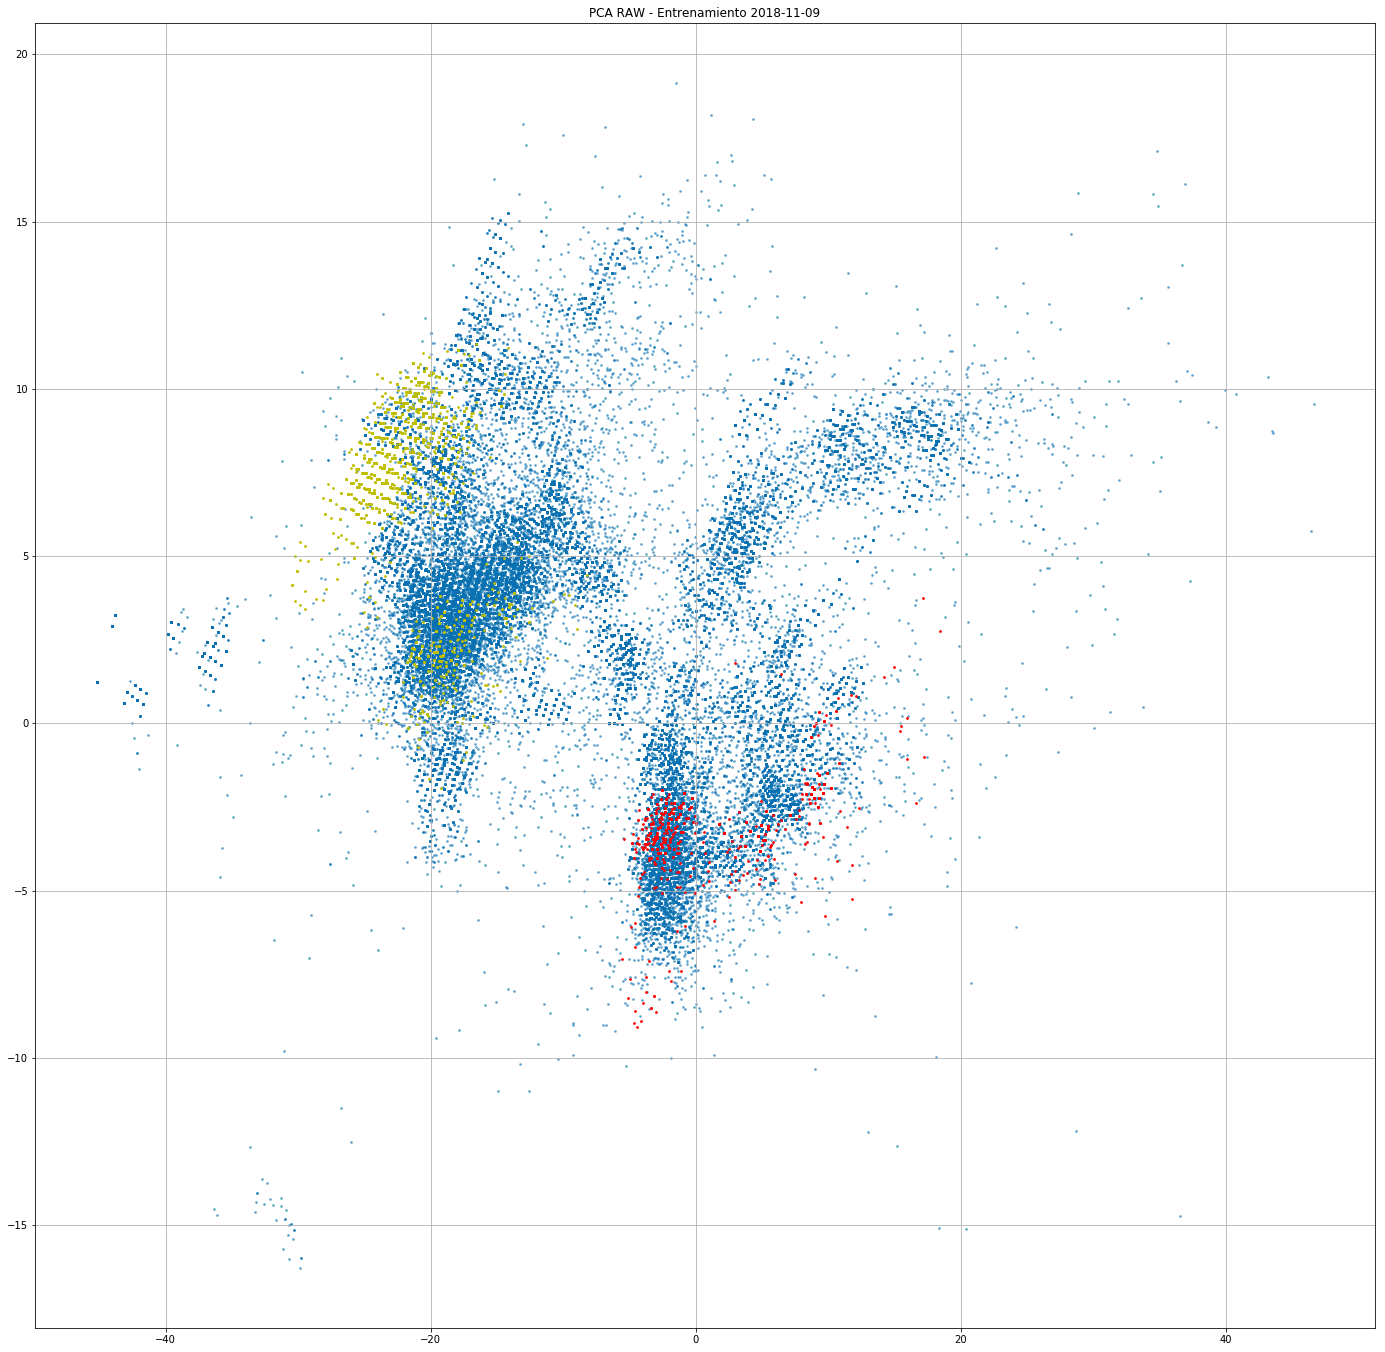

In [89]:
clf = analisis(crisis1)
fig,ax = dibuja(crisis1,clf,False)
dibuja(crisis2,clf,False,fig,ax)
dibuja(crisis3,clf,False,fig,ax)
dibuja(crisis1,clf,True,fig,ax)
dibuja(crisis2,clf,True,fig,ax,c='y')
dibuja(crisis3,clf,True,fig,ax,c='y')
plt.grid(True)
plt.title('PCA RAW - Entrenamiento 2018-11-09')

#### Crisis 2

In [90]:
crisis2.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
6931232,2019-01-28 21:15:11,0.0,20.491803,18.032787,21.311475,9.016393,6.557377,False
6931233,2019-01-28 21:15:12,0.0,20.491803,18.032787,21.311475,9.016393,6.557377,False
6931234,2019-01-28 21:15:13,0.0,20.491803,18.032787,21.311475,9.016393,6.557377,False
6931235,2019-01-28 21:15:14,0.0,19.672131,18.032787,21.311475,9.836066,6.557377,False
6931236,2019-01-28 21:15:15,0.0,20.491803,18.852459,22.131148,9.836066,6.557377,False


Text(0.5, 1.0, 'PCA RAW - Entrenamiento 2019-01-28')

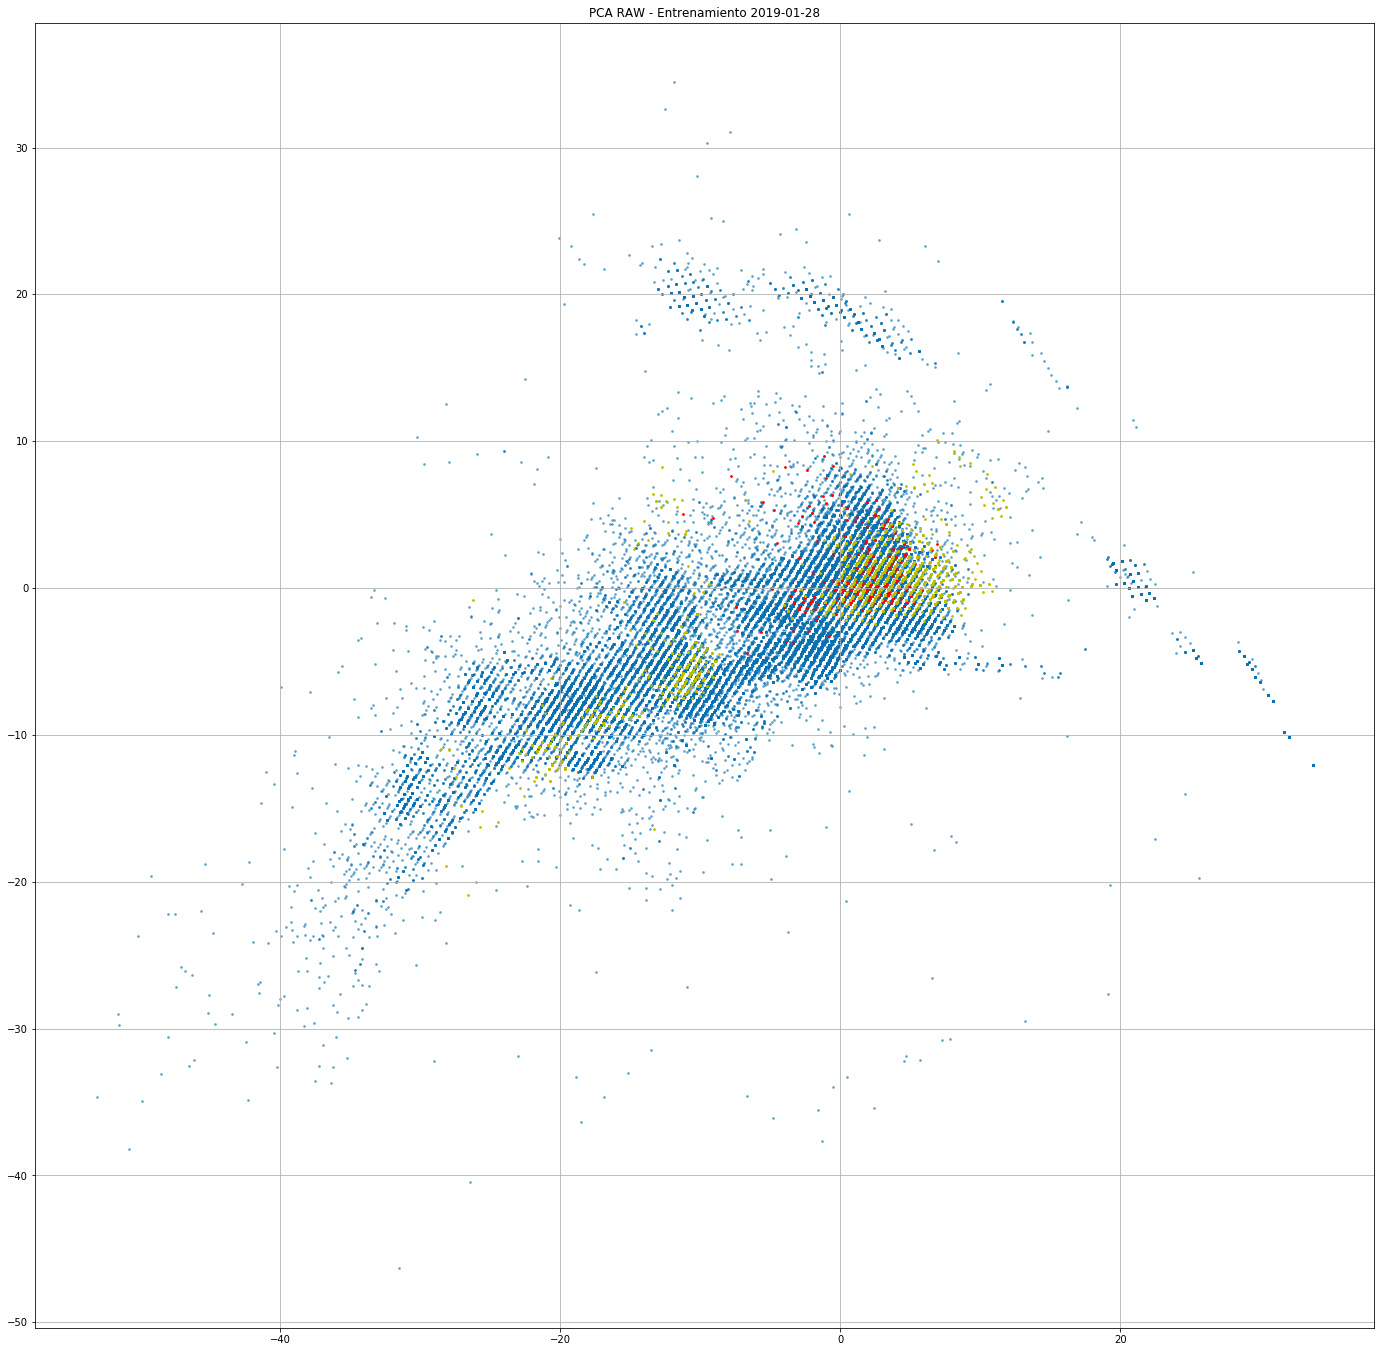

In [92]:
clf = analisis(crisis2)
fig,ax = dibuja(crisis2,clf,False)
dibuja(crisis1,clf,False,fig,ax)
dibuja(crisis3,clf,False,fig,ax)
dibuja(crisis2,clf,True,fig,ax)
dibuja(crisis1,clf,True,fig,ax,c='y')
dibuja(crisis3,clf,True,fig,ax,c='y')
plt.grid(True)
plt.title('PCA RAW - Entrenamiento 2019-01-28')

#### Crisis 3

In [94]:
crisis3.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
2164084,2019-02-06 21:11:50,0.0,14.754098,27.049180,30.327869,10.655738,0.0,False
2164085,2019-02-06 21:11:51,0.0,15.573770,26.229508,24.590164,6.557377,0.0,False
2164087,2019-02-06 21:11:52,0.0,19.672131,29.508197,23.770492,4.918033,0.0,False
2164086,2019-02-06 21:11:52,0.0,18.032787,30.327869,27.049180,7.377049,0.0,False
2164088,2019-02-06 21:11:53,0.0,18.032787,25.409836,17.213115,0.000000,0.0,False


Text(0.5, 1.0, 'PCA RAW - Entrenamiento 2019-02-06')

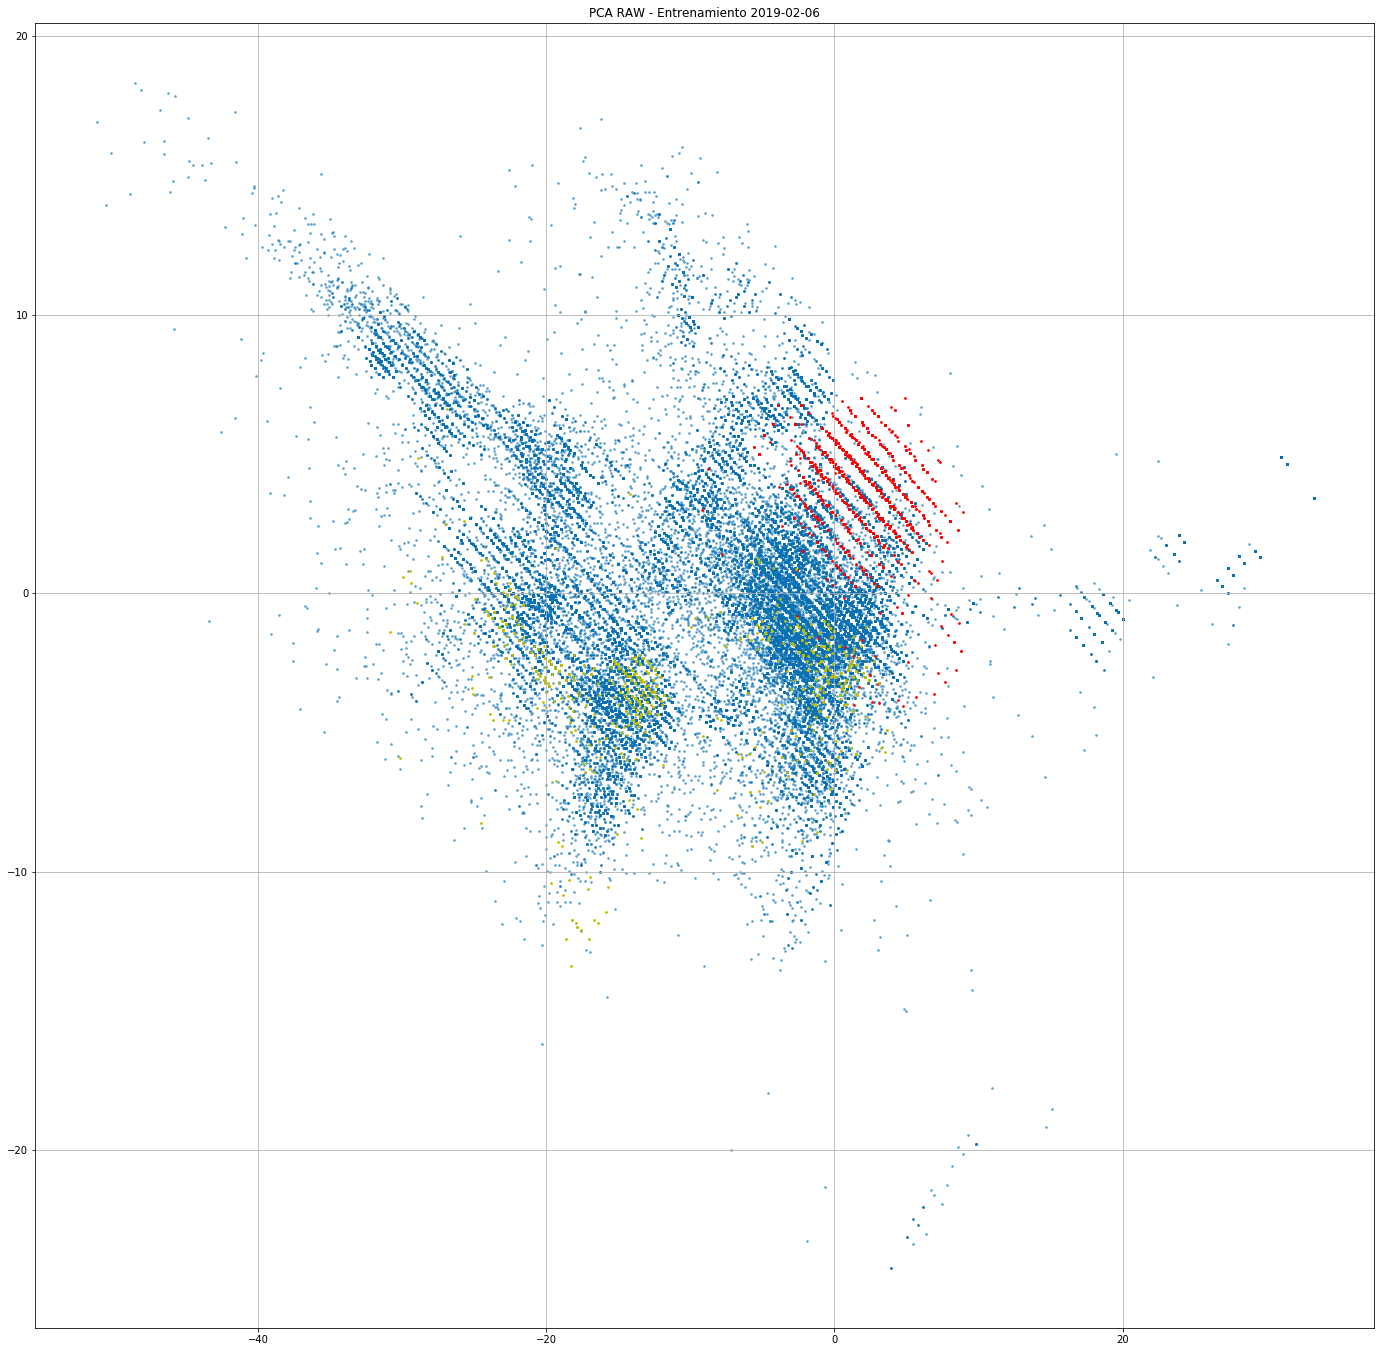

In [95]:
clf = analisis(crisis3)
fig,ax = dibuja(crisis3,clf,False)
dibuja(crisis2,clf,False,fig,ax)
dibuja(crisis1,clf,False,fig,ax)
dibuja(crisis3,clf,True,fig,ax)
dibuja(crisis2,clf,True,fig,ax,c='y')
dibuja(crisis1,clf,True,fig,ax,c='y')
plt.grid(True)
plt.title('PCA RAW - Entrenamiento 2019-02-06')

#### Todas las crisis

In [96]:
crisis_full = pd.concat(crisis,axis=0)
crisis_full.head()

,DateTime,P1,P2,P3,P4,P5,P6,target
4089271,2018-11-09 21:03:27,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
4089270,2018-11-09 21:03:27,4.098361,18.852459,22.131148,22.131148,13.114754,6.557377,False
4089272,2018-11-09 21:03:28,4.918033,19.672131,22.131148,22.950820,13.934426,7.377049,False
4089273,2018-11-09 21:03:29,4.098361,18.852459,21.311475,22.131148,13.114754,6.557377,False
4089274,2018-11-09 21:03:30,0.000000,18.852459,22.131148,22.950820,13.114754,6.557377,False


Text(0.5, 1.0, 'PCA Raw - Todas las crisis')

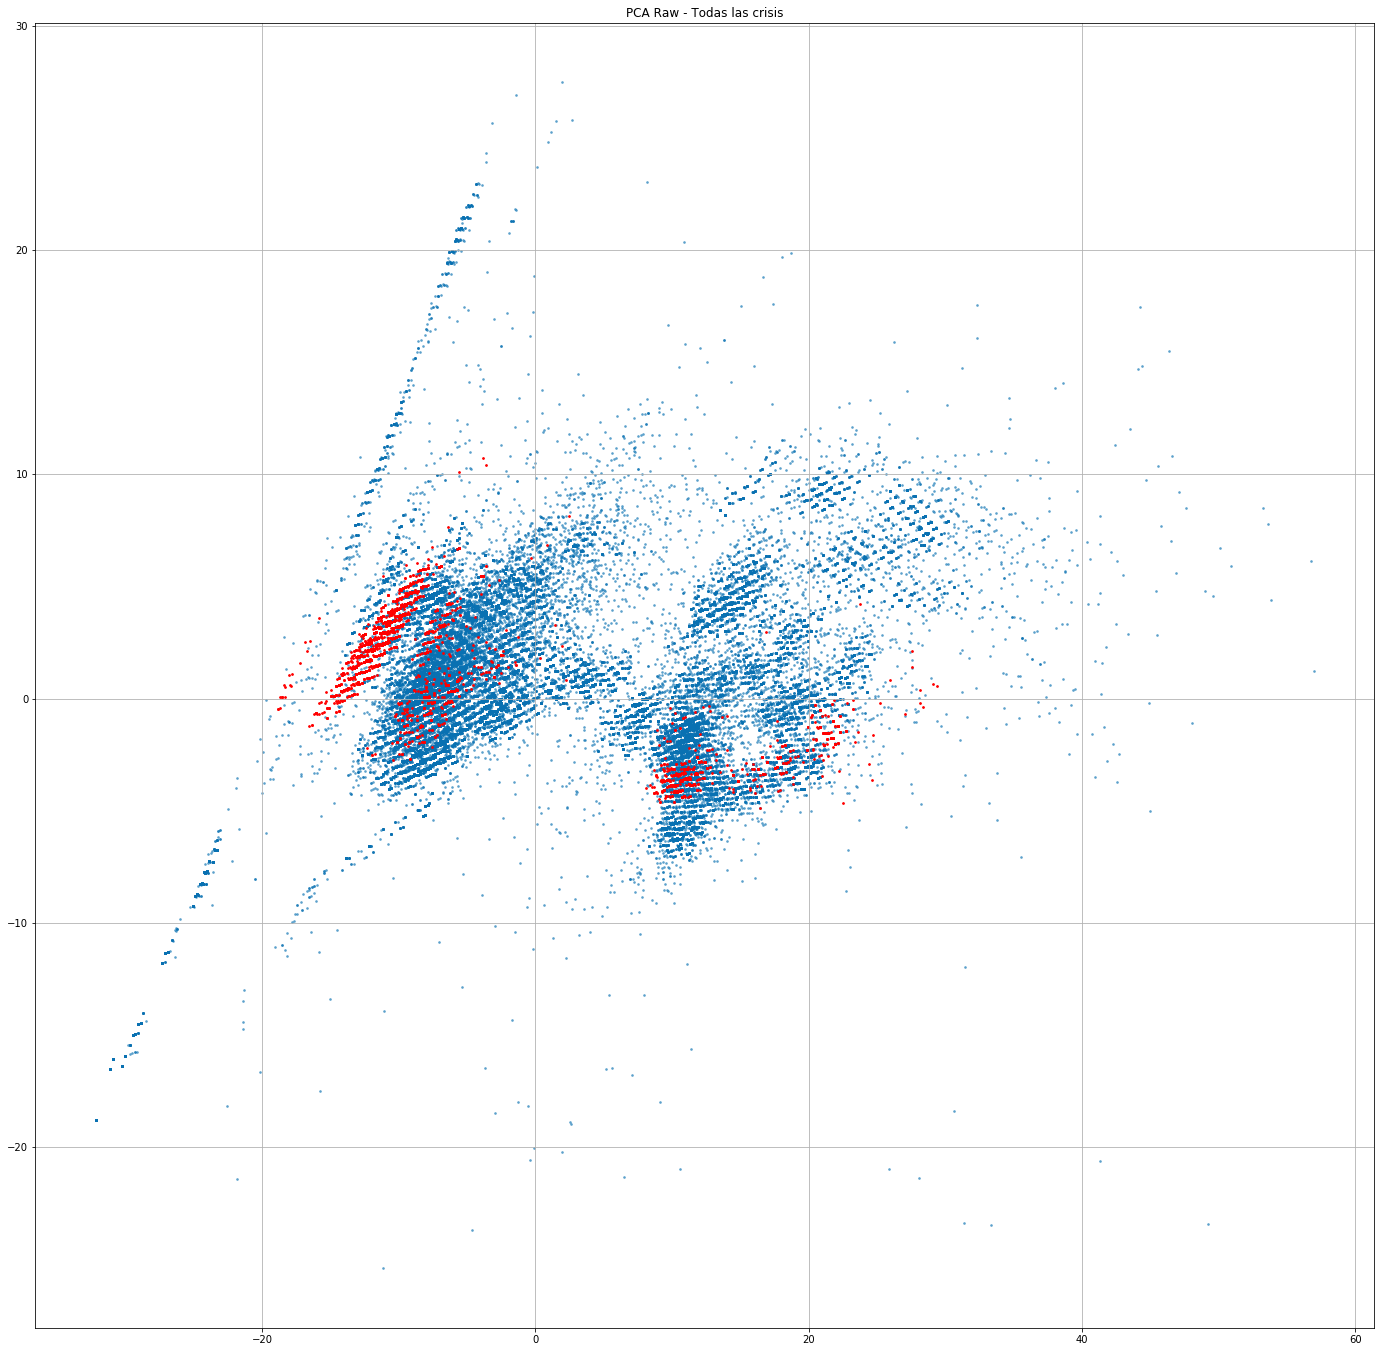

In [98]:
clf = analisis(crisis_full)
fig,ax = dibuja(crisis_full,clf,False)
dibuja(crisis_full,clf,True,fig,ax)
plt.grid(True)
plt.title("PCA Raw - Todas las crisis")